# 26 Sep 23 - Graphing Electric Fields

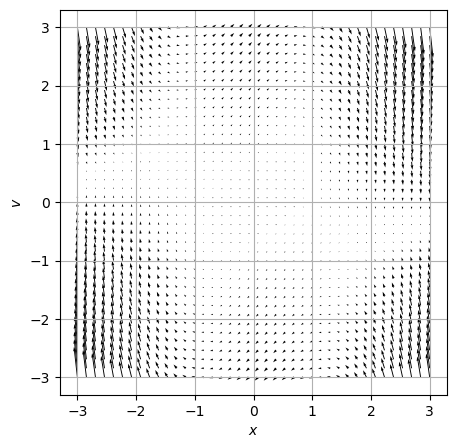

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5,5)
y = np.linspace(-5,5,5)
X,Y = np.meshgrid(x,y)
u = X**2
v = Y**2

q = 1e-4
r_source = np.array([0,0])
k = 9e9

def VP_eqn(x, v, mu = 1.):
    xdot, vdot = [v,-mu * (x**2 - 1)*v - x]
    return xdot, vdot

def point_charge_E(X, Y, q,r_source):
    xdot, vdot = np.zeros(X.shape), np.zeros(Y.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = Y[i, j]
            xdot[i,j], vdot[i,j] = VP_eqn(xloc, yloc,mu)
    return xdot, vdot

N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
xdot, vdot = point_charge_E(X, V,mu)
ax = plt.figure(figsize=(5,5))
Q = plt.quiver(X, V, xdot, vdot, color='k')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()

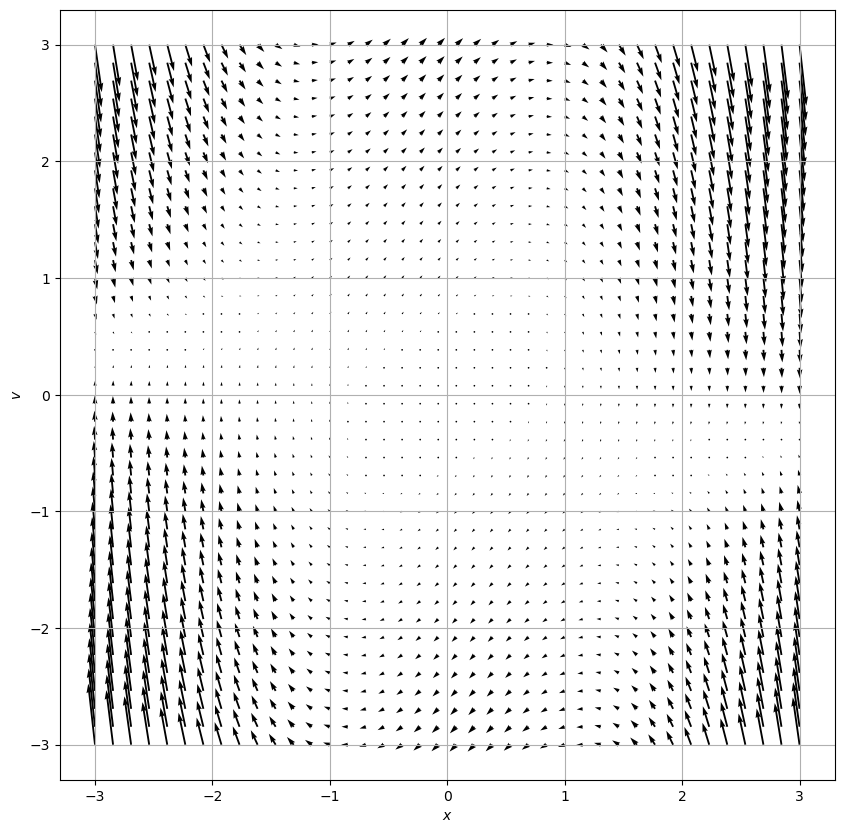

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def VP_eqn(x, v, mu = 1.):
    xdot, vdot = [v,-mu * (x**2 - 1)*v - x]
    return xdot, vdot

def VP_phase(X, Y, mu):
    xdot, vdot = np.zeros(X.shape), np.zeros(Y.shape)
    Xlim, Ylim = X.shape
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = Y[i, j]
            xdot[i,j], vdot[i,j] = VP_eqn(xloc, yloc,mu)
    return xdot, vdot

def VP_eqn_for_solve_ivp(t,curr_vals, mu=1): # need to rephrase this to work with what solve_ivp expects
    x, v = curr_vals 
    xdot, vdot = VP_eqn(x,v,mu)
    return xdot,vdot

# Numerical Integration
tmax = 20
dt = 0.05
tspan = (0,tmax)
t = np.arange(0,tmax,dt)
mu = 1.
initial_condition = [1, 1] 
solved = solve_ivp(VP_eqn_for_solve_ivp,tspan,initial_condition,t_eval = t, args = (mu,),method="RK45")

# Plotting stuff
N = 40
x = np.linspace(-3., 3., N)
v = np.linspace(-3., 3., N)
X, V = np.meshgrid(x, v)
xdot, vdot = VP_phase(X, V,mu)
ax = plt.figure(figsize=(10,10))
Q = plt.quiver(X, V, xdot, vdot, color='k')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$v$')
plt.show()